In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [28]:
size = 100
x = np.linspace(0, 12,size)
y = -0.3*np.power(x,3)+3*np.power(x,2)+10*x-2+np.random.rand(size)
x = x+np.random.rand(size)

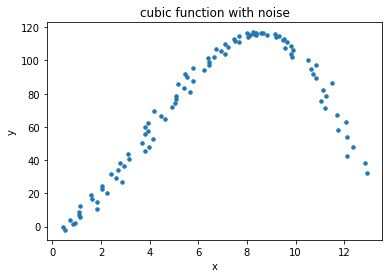

In [39]:
plt.scatter(x,y,s=12)
plt.title("cubic function with noise")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('cubicWithNoise.png',bbox_inches='tight')
plt.show()

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(x.reshape(-1,1),y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

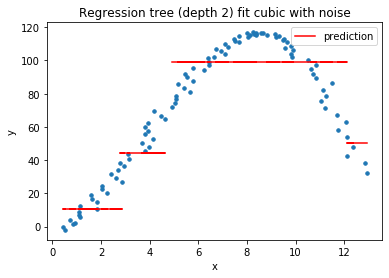

In [43]:
preds = dtr.predict(np.linspace(0, 12,size).reshape(-1,1))
startInds = [0]
for i in range(1,len(preds)):
    if preds[i] != preds[i-1]:
        startInds.append(i)
plt.scatter(x,y,s=12)
for i in range(len(startInds)-1):
    start = startInds[i]
    end = startInds[i+1]
    if i == 0:
        plt.plot(x[start:end],preds[start:end], label='prediction', c='red')
    else:
        plt.plot(x[start:end],preds[start:end], c='red')

plt.plot(x[end:],preds[end:], c='red')
plt.legend()
plt.title("Regression tree (depth 2) fit cubic with noise")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('cubicWithNoiseDTRFit.png',bbox_inches='tight')
plt.show()

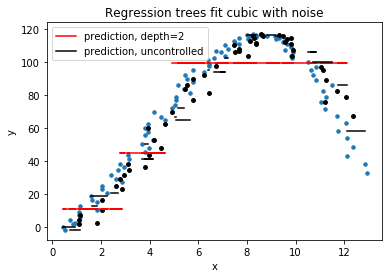

In [46]:
dtr_unc = DecisionTreeRegressor()
dtr_unc.fit(x.reshape(-1,1),y)
preds_unc = dtr_unc.predict(np.linspace(0, 12,size).reshape(-1,1))
startInds_unc = [0]
for i in range(1,len(preds_unc)):
    if preds_unc[i] != preds_unc[i-1]:
        startInds_unc.append(i)
plt.scatter(x,y,s=12)

for i in range(len(startInds)-1):
    start = startInds[i]
    end = startInds[i+1]
    if i == 0:
        plt.plot(x[start:end],preds[start:end], label='prediction, depth=2', c='red')
    else:
        plt.plot(x[start:end],preds[start:end], c='red')
        
for i in range(len(startInds_unc)-1):
    start = startInds_unc[i]
    end = startInds_unc[i+1]
    if i == 0:
        if end == start+1:
            plt.scatter(x[start:end],preds_unc[start:end], label='prediction, uncontrolled', c='black',s=15)
        else:
            plt.plot(x[start:end],preds_unc[start:end], label='prediction, uncontrolled', c='black')
    else:
        if end == start+1:
            plt.scatter(x[start:end],preds_unc[start:end], c='black',s=15)
        else:
            plt.plot(x[start:end],preds_unc[start:end], c='black')

plt.plot(x[end:],preds[end:], c='red')
plt.legend()
plt.title("Regression trees fit cubic with noise")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('cubicWithNoiseDTRFitComparison.png',bbox_inches='tight')
plt.show()

In [42]:
from sklearn.tree import export_graphviz
export_graphviz(
            dtr,
            out_file="cubic_tree.dot",
            feature_names='y',
            rounded=True,
            filled=True
        )

In [2]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X, y = data["data"], data["target"]
pipeline = Pipeline([('stan_scale',StandardScaler())])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = pipeline.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=data["feature_names"])

X_test = pipeline.transform(X_test)
X_test = pd.DataFrame(X_test,columns=data["feature_names"])

y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:219: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


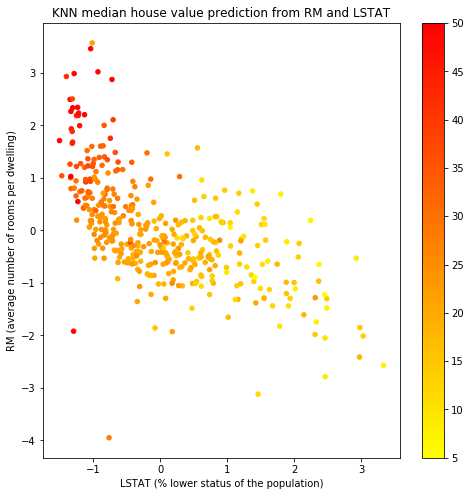

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
X_train.plot(kind='scatter',x="LSTAT",y='RM',color=y_train['target'],cmap=plt.get_cmap('autumn_r'),ax=ax)
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel("RM (average number of rooms per dwelling)")
plt.title("KNN median house value prediction from RM and LSTAT")
plt.savefig('bostonHousingKNNReg1.png', bbox_inches='tight')
plt.show()

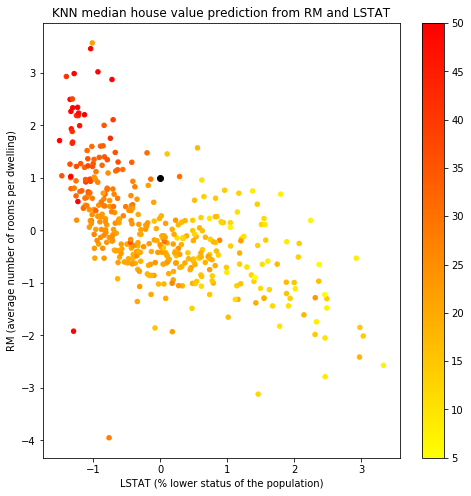

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
X_train.plot(kind='scatter',x="LSTAT",y='RM',color=y_train['target'],cmap=plt.get_cmap('autumn_r'),ax=ax)
plt.scatter([0],[1],color='black')
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel("RM (average number of rooms per dwelling)")
plt.title("KNN median house value prediction from RM and LSTAT")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train[["LSTAT",'RM']],y_train)
X_new = np.c_[[0],[1]]
pred = knn_reg.predict(np.c_[x,y])
X_train_red = X_train[["LSTAT",'RM']].values
X_train_red = np.append(X_train_red,X_new).reshape(-1,2)

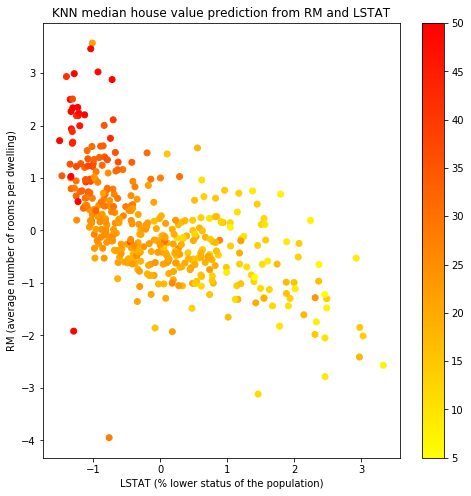

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(x=X_train_red[:, 0],y=X_train_red[:, 1], c = np.append(y_train['target'],pred),
            cmap=plt.get_cmap('autumn_r'))
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel("RM (average number of rooms per dwelling)")
plt.title("KNN median house value prediction from RM and LSTAT")
plt.colorbar()
plt.show()

In [9]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.5618924285266482